In [31]:
import pandas as pd
import os 
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook as tqdm
import numpy as np
import joblib
import matplotlib.pyplot as plt
os.listdir('../data/phase_2')

['Aroma-1 Unit 000 Split_Factor Calculation.xlsx',
 'col_names.pkl',
 'FCFC Import Naphtha Composition Lab_001~100_R2.xlsx',
 'train(add_split_factor).csv',
 'train.csv',
 'transform_matrix.csv',
 '~$FCFC Import Naphtha Composition Lab_001~100_R2.xlsx']

In [32]:
col_names = joblib.load('../data/phase_2/col_names.pkl')
col_names.keys()

dict_keys(['component_list', 'xna', 'xle', 'xhc', 'xhe', 'fna', 'fle', 'fhc', 'fhe', 'all', 'case', 'sle', 'shc', 'she'])

In [33]:
def get_col(df,name):
    return df.columns[df.columns.str.contains(name)].tolist()

# load data

In [34]:
df = pd.read_csv('../data/phase_2/train(add_split_factor).csv',index_col=0)
df.head()

,Case Conditions_C6P- in Heart Cut (Input)_wt%,Case Conditions_C7+ in Light End (Input)_wt%,Case Conditions_Feed Rate to C013 (Input)_m3/hr,Case Conditions_Heart Cut Prod. Rate (Input)_m3/hr,Naphtha Properties_Oxygen_wt%,Naphtha Properties_Methane_wt%,Naphtha Properties_Ethane_wt%,Naphtha Properties_Propane_wt%,Naphtha Properties_n-Butane_wt%,Naphtha Properties_i-Pentane_wt%,...,"Individual Component to Heavy End Split Factor_2,2,3,3-Tetramethylhexane_Ratio",Individual Component to Heavy End Split Factor_3-Methylnoe_Ratio,Individual Component to Heavy End Split Factor_tert-Butylcyclohexane_Ratio,Individual Component to Heavy End Split Factor_n-Decane_Ratio,"Individual Component to Heavy End Split Factor_1,2-Diethylbenzene_Ratio",Individual Component to Heavy End Split Factor_n-Undecane_Ratio,Individual Component to Heavy End Split Factor_n-Pentylbenzene_Ratio,Individual Component to Heavy End Split Factor_n-Dodecane_Ratio,Individual Component to Heavy End Split Factor_n-Hexylbenzene_Ratio,Individual Component to Heavy End Split Factor_n-Tridecane_Ratio
0,1.0,2.5,10.0,100.0,0.0,0.0,0.0,0.0,0.001,0.007,...,0.286023,0.311643,0.314721,0.327912,0.338773,0.361039,0.367539,0.377236,0.380533,1.0
1,1.0,5.0,10.0,100.0,0.0,0.0,0.0,0.0,0.001,0.007,...,0.280002,0.305426,0.308505,0.321589,0.332401,0.354564,0.361043,0.370712,0.374002,1.0
2,1.0,10.0,10.0,100.0,0.0,0.0,0.0,0.0,0.001,0.007,...,0.272878,0.298330,0.301478,0.314518,0.325381,0.347579,0.354085,0.363783,0.367089,1.0
3,0.5,2.5,10.0,100.0,0.0,0.0,0.0,0.0,0.001,0.007,...,0.312462,0.344944,0.349356,0.364900,0.378177,0.404528,0.412145,0.423436,0.427255,1.0
4,0.5,5.0,10.0,100.0,0.0,0.0,0.0,0.0,0.001,0.007,...,0.305026,0.337376,0.341799,0.357269,0.370526,0.396855,0.404473,0.415776,0.419600,1.0


# define columns

In [35]:
xna_col = col_names['xna']
sp_le_col = col_names['sle']
sp_hc_col = col_names['shc']
sp_he_col = col_names['she']
sp_col_162 = sp_le_col + sp_hc_col + sp_he_col

# get xna and sp162

In [36]:
xna = df[xna_col]
sp162 = df[sp_col_162]

# build transformer

In [37]:
class transformer2(object):
    def __init__(self):
        # output columns
        self.le = col_names['xle']
        self.hc = col_names['xhc']
        self.he = col_names['xhe']
        
        # split factor columns
        self.le_sp = col_names['sle']
        self.hc_sp = col_names['shc']
        self.he_sp = col_names['she']
    
    @staticmethod
    def _calculate_output(X,S,col_name):
        X, S = X.values, S.values
        F = np.diag(X@(S.T)).reshape(-1,1)
        Y = 100*(X*S)/(F)
        return pd.DataFrame(Y,columns=col_name)
    
    def __call__(self,xna,sp162):
        sle = sp162[self.le_sp] #SLE
        shc = sp162[self.hc_sp] #SHC
        she = sp162[self.he_sp] #SHE
        x_le = self._calculate_output(xna,sle,self.le) #XLE
        x_hc = self._calculate_output(xna,shc,self.hc) #XHC
        x_he = self._calculate_output(xna,she,self.he) #XHE
        return pd.concat([x_le,x_hc,x_he],axis=1)

# make transform

In [38]:
tr = transformer2()
y_pred = tr(xna,sp162)
y_pred

,Light End Product Properties_Oxygen_wt%,Light End Product Properties_Methane_wt%,Light End Product Properties_Ethane_wt%,Light End Product Properties_Propane_wt%,Light End Product Properties_n-Butane_wt%,Light End Product Properties_i-Pentane_wt%,Light End Product Properties_n-Pentane_wt%,Light End Product Properties_tr2-Pentene_wt%,Light End Product Properties_Cyclopentane_wt%,Light End Product Properties_3-Methylpentane_wt%,...,"Heavy End Product Properties_2,2,3,3-Tetramethylhexane_wt%",Heavy End Product Properties_3-Methylnonane_wt%,Heavy End Product Properties_tert-Butylcyclohexane_wt%,Heavy End Product Properties_n-Decane_wt%,"Heavy End Product Properties_1,2-Diethylbenzene_wt%",Heavy End Product Properties_n-Undecane_wt%,Heavy End Product Properties_n-Pentylbenzene_wt%,Heavy End Product Properties_n-Dodecane_wt%,Heavy End Product Properties_n-Hexylbenzene_wt%,Heavy End Product Properties_n-Tridecane_wt%
0,0.0,0.0,0.0,0.000000,0.034513,0.237749,0.538813,0.000000,0.161989,17.113226,...,5.521039,14.039832,1.707832,4.532045,1.669522,0.943603,0.105828,0.016711,0.021071,0.0
1,0.0,0.0,0.0,0.000000,0.032172,0.221542,0.501958,0.000000,0.150727,15.873676,...,5.534844,14.090729,1.714373,4.551583,1.677525,0.948971,0.106458,0.016817,0.021208,0.0
2,0.0,0.0,0.0,0.000000,0.029218,0.201138,0.455627,0.000000,0.136671,14.362451,...,5.600077,14.289094,1.739321,4.621556,1.704825,0.965813,0.108395,0.017133,0.021611,0.0
3,0.0,0.0,0.0,0.000000,0.028522,0.197306,0.448502,0.000000,0.137338,15.664031,...,6.499451,16.746011,2.042894,5.434623,2.008335,1.139311,0.127881,0.020213,0.025494,0.0
4,0.0,0.0,0.0,0.000000,0.026649,0.184299,0.418883,0.000000,0.128209,14.613868,...,6.538652,16.879072,2.059779,5.483574,2.027836,1.151853,0.129335,0.020454,0.025802,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14810,0.0,0.0,0.0,1.298106,2.542351,20.598131,19.596767,0.508198,2.097699,16.595299,...,1.719414,4.213681,0.508897,1.865204,1.087082,0.378445,0.066883,0.008494,0.012845,0.0
14811,0.0,0.0,0.0,1.271060,2.468864,19.759333,18.731648,0.485872,2.017195,16.913946,...,1.856814,4.562272,0.551647,2.022603,1.180397,0.411111,0.072681,0.009230,0.013960,0.0
14812,0.0,0.0,0.0,1.317078,2.599066,21.293316,20.311554,0.526668,2.152347,16.065631,...,1.609842,3.936431,0.475111,1.740281,1.013332,0.352447,0.062269,0.007905,0.011954,0.0
14813,0.0,0.0,0.0,1.285722,2.508491,20.208793,19.196071,0.497854,2.062281,16.805429,...,1.750710,4.291770,0.518403,1.900005,1.107448,0.385453,0.068116,0.008649,0.013079,0.0


In [39]:
y_real = df[y_pred.columns]
y_real

,Light End Product Properties_Oxygen_wt%,Light End Product Properties_Methane_wt%,Light End Product Properties_Ethane_wt%,Light End Product Properties_Propane_wt%,Light End Product Properties_n-Butane_wt%,Light End Product Properties_i-Pentane_wt%,Light End Product Properties_n-Pentane_wt%,Light End Product Properties_tr2-Pentene_wt%,Light End Product Properties_Cyclopentane_wt%,Light End Product Properties_3-Methylpentane_wt%,...,"Heavy End Product Properties_2,2,3,3-Tetramethylhexane_wt%",Heavy End Product Properties_3-Methylnonane_wt%,Heavy End Product Properties_tert-Butylcyclohexane_wt%,Heavy End Product Properties_n-Decane_wt%,"Heavy End Product Properties_1,2-Diethylbenzene_wt%",Heavy End Product Properties_n-Undecane_wt%,Heavy End Product Properties_n-Pentylbenzene_wt%,Heavy End Product Properties_n-Dodecane_wt%,Heavy End Product Properties_n-Hexylbenzene_wt%,Heavy End Product Properties_n-Tridecane_wt%
0,0.0,0.0,0.0,0.000000,0.034513,0.237749,0.538813,0.000000,0.161989,17.113228,...,5.521039,14.039832,1.707832,4.532045,1.669522,0.943603,0.105828,0.016711,0.021071,0.0
1,0.0,0.0,0.0,0.000000,0.032172,0.221542,0.501958,0.000000,0.150727,15.873676,...,5.534844,14.090729,1.714373,4.551583,1.677525,0.948971,0.106458,0.016817,0.021208,0.0
2,0.0,0.0,0.0,0.000000,0.029218,0.201138,0.455627,0.000000,0.136671,14.362450,...,5.600079,14.289098,1.739322,4.621557,1.704826,0.965813,0.108395,0.017133,0.021611,0.0
3,0.0,0.0,0.0,0.000000,0.028522,0.197306,0.448502,0.000000,0.137338,15.664032,...,6.499452,16.746012,2.042894,5.434623,2.008336,1.139311,0.127881,0.020213,0.025494,0.0
4,0.0,0.0,0.0,0.000000,0.026649,0.184299,0.418883,0.000000,0.128209,14.613869,...,6.538652,16.879072,2.059779,5.483574,2.027836,1.151853,0.129335,0.020454,0.025802,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14810,0.0,0.0,0.0,1.298106,2.542351,20.598131,19.596767,0.508198,2.097699,16.595299,...,1.719414,4.213682,0.508897,1.865205,1.087083,0.378445,0.066883,0.008494,0.012845,0.0
14811,0.0,0.0,0.0,1.271060,2.468864,19.759331,18.731646,0.485872,2.017195,16.913944,...,1.856814,4.562272,0.551647,2.022603,1.180397,0.411111,0.072681,0.009230,0.013960,0.0
14812,0.0,0.0,0.0,1.317077,2.599065,21.293312,20.311550,0.526668,2.152347,16.065628,...,1.609842,3.936430,0.475111,1.740281,1.013332,0.352447,0.062269,0.007905,0.011954,0.0
14813,0.0,0.0,0.0,1.285722,2.508491,20.208796,19.196074,0.497854,2.062281,16.805431,...,1.750710,4.291770,0.518403,1.900005,1.107448,0.385453,0.068116,0.008649,0.013079,0.0


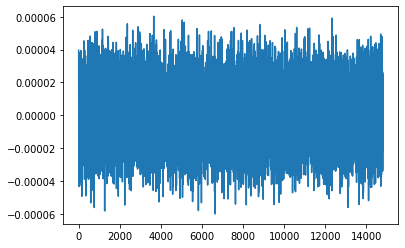

In [40]:
plt.plot(np.sum(y_real - y_pred,axis=1).values)

# save

In [41]:
joblib.dump(tr,'../model/transformer(SP162_to_Y162).pkl')

['../model/transformer(SP162_to_Y162).pkl']